# **Supervised Learning - Online Shoppers Purchasing Intention**
##### *Artificial Intelligence - Assignment No. 2*

#### Notebook by **T09G94**
- Joana Santos, up202006279
- Mafalda Costa, up202006417
- Mariana Carvalho, up202007620

### **Table of Contents**

### **Introduction**
For this second IART assignment we are applying machine learning models and algorithms related to supervised learning. For our specific theme, **"Online Shoppers purchasing intention"**, we aim to predict whether an online shopper is likely to make a purchase or not, using **supervised machine learning algorithms for classification**. We will conduct an exploratory **data analysis** to determine the relevant features for our prediction task and **evaluate** various **models** to identify the most accurate and efficient one. Our goal is to provide valuable insights into customer behavior.
The input data we will use to make predictions and identify patterns consists in a data set of
**17 features** of various types and **one target**, the **Revenue**, which indicates if a person made a buy or not. Seven of the features in the dataset are categorical, which require further pre processing

### **Required libraries**
- NumPy
- Pandas
- Matplotlib
- Seaborn
- scikit-learn
- nbformat
- plotly

### **Metrics and Models and Frameworks**
#### Metrics
- Confusion matrix
- Performance during learning
- Precision
- Recall
- Accuracu
- F1 measure
- Time spent to train/test the models

#### Models and Frameworks
- Decision Tree
- k-nearest neighbours
- Random Forest
- Support Vector Machines (SVM)
- eXtreme Gradient Boosting
- Neural network
- Naive Bayes

### Attributes
The dataset consists of 10 numerical and 8 categorical attributes.
- **Administrative**: count of pages visited by the visitor (e.g. user details and account)
- **Administrative_Duration**: total time spent (seconds) in on Administrative type of page
- **Informational**: count of pages visited by the visitor (e.g. about and contact of the website)
- **Informational_Duration**: total time spent (seconds) in on Informational type of page
- **ProductRelated**: count of pages visited by the visitor (e.g. product details)
- **ProductRelated_Duration**: total time spent (seconds) in on ProductRelated type of page
- **BounceRates**: percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server
- **ExitRates**: the percentage of visitors to a page on the website from which they exit the website to a different website
- **PageValues**: the average value for a page that a user visited before landing on the goal page
- **SpecialDay**: indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day)
- **Month**: the month of the visit to the website
- **OperatingSystems**: the type of operation system used by the visitor
- **Browser**: the type of browser used by the visitor
- **Region**: the geographic region from which the session started
- **TrafficType**: describes how traffic arrived on the website (Direct, Organic, Referral, Social, Email, Display and Paid)
- **VisitorType**: returning or new visitor or other
- **Weekend**: indicating whether the date of the visit is weekend
- **Revenue**: indicates whether the visitor made a purchase or not

In [90]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import sklearn.tree as tree
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold, RepeatedKFold, RepeatedStratifiedKFold

Dataset analysis to check for the need for data pre-processing.

In [91]:
data = pd.read_csv("dataset/online_shoppers_intention.csv")
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [92]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [93]:
target="Revenue"
categorical_features=["OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend", "Month"]
numerical_features=data.columns.drop(categorical_features).drop(target)

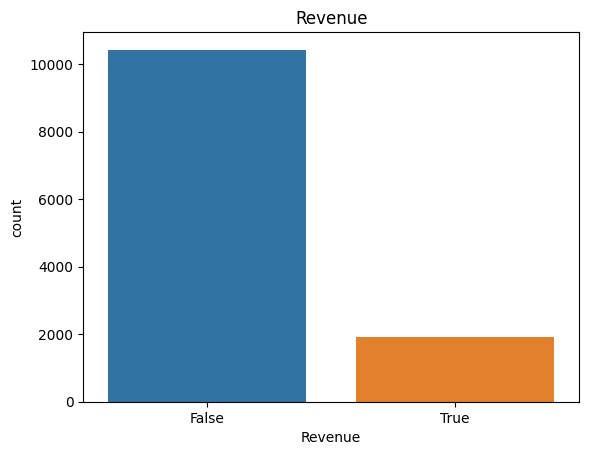

In [94]:
sb.countplot(x=target,data=data)
plt.title("Revenue")
plt.show()


The data is free of NULL values

In [95]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Removing duplicate rows.

In [96]:
print("Total number of duplicate rows: ", data.duplicated().sum())
data.drop_duplicates(inplace=True)
print("Total number of duplicate rows: ", data.duplicated().sum())

Total number of duplicate rows:  125
Total number of duplicate rows:  0


#### Outliers Analysis

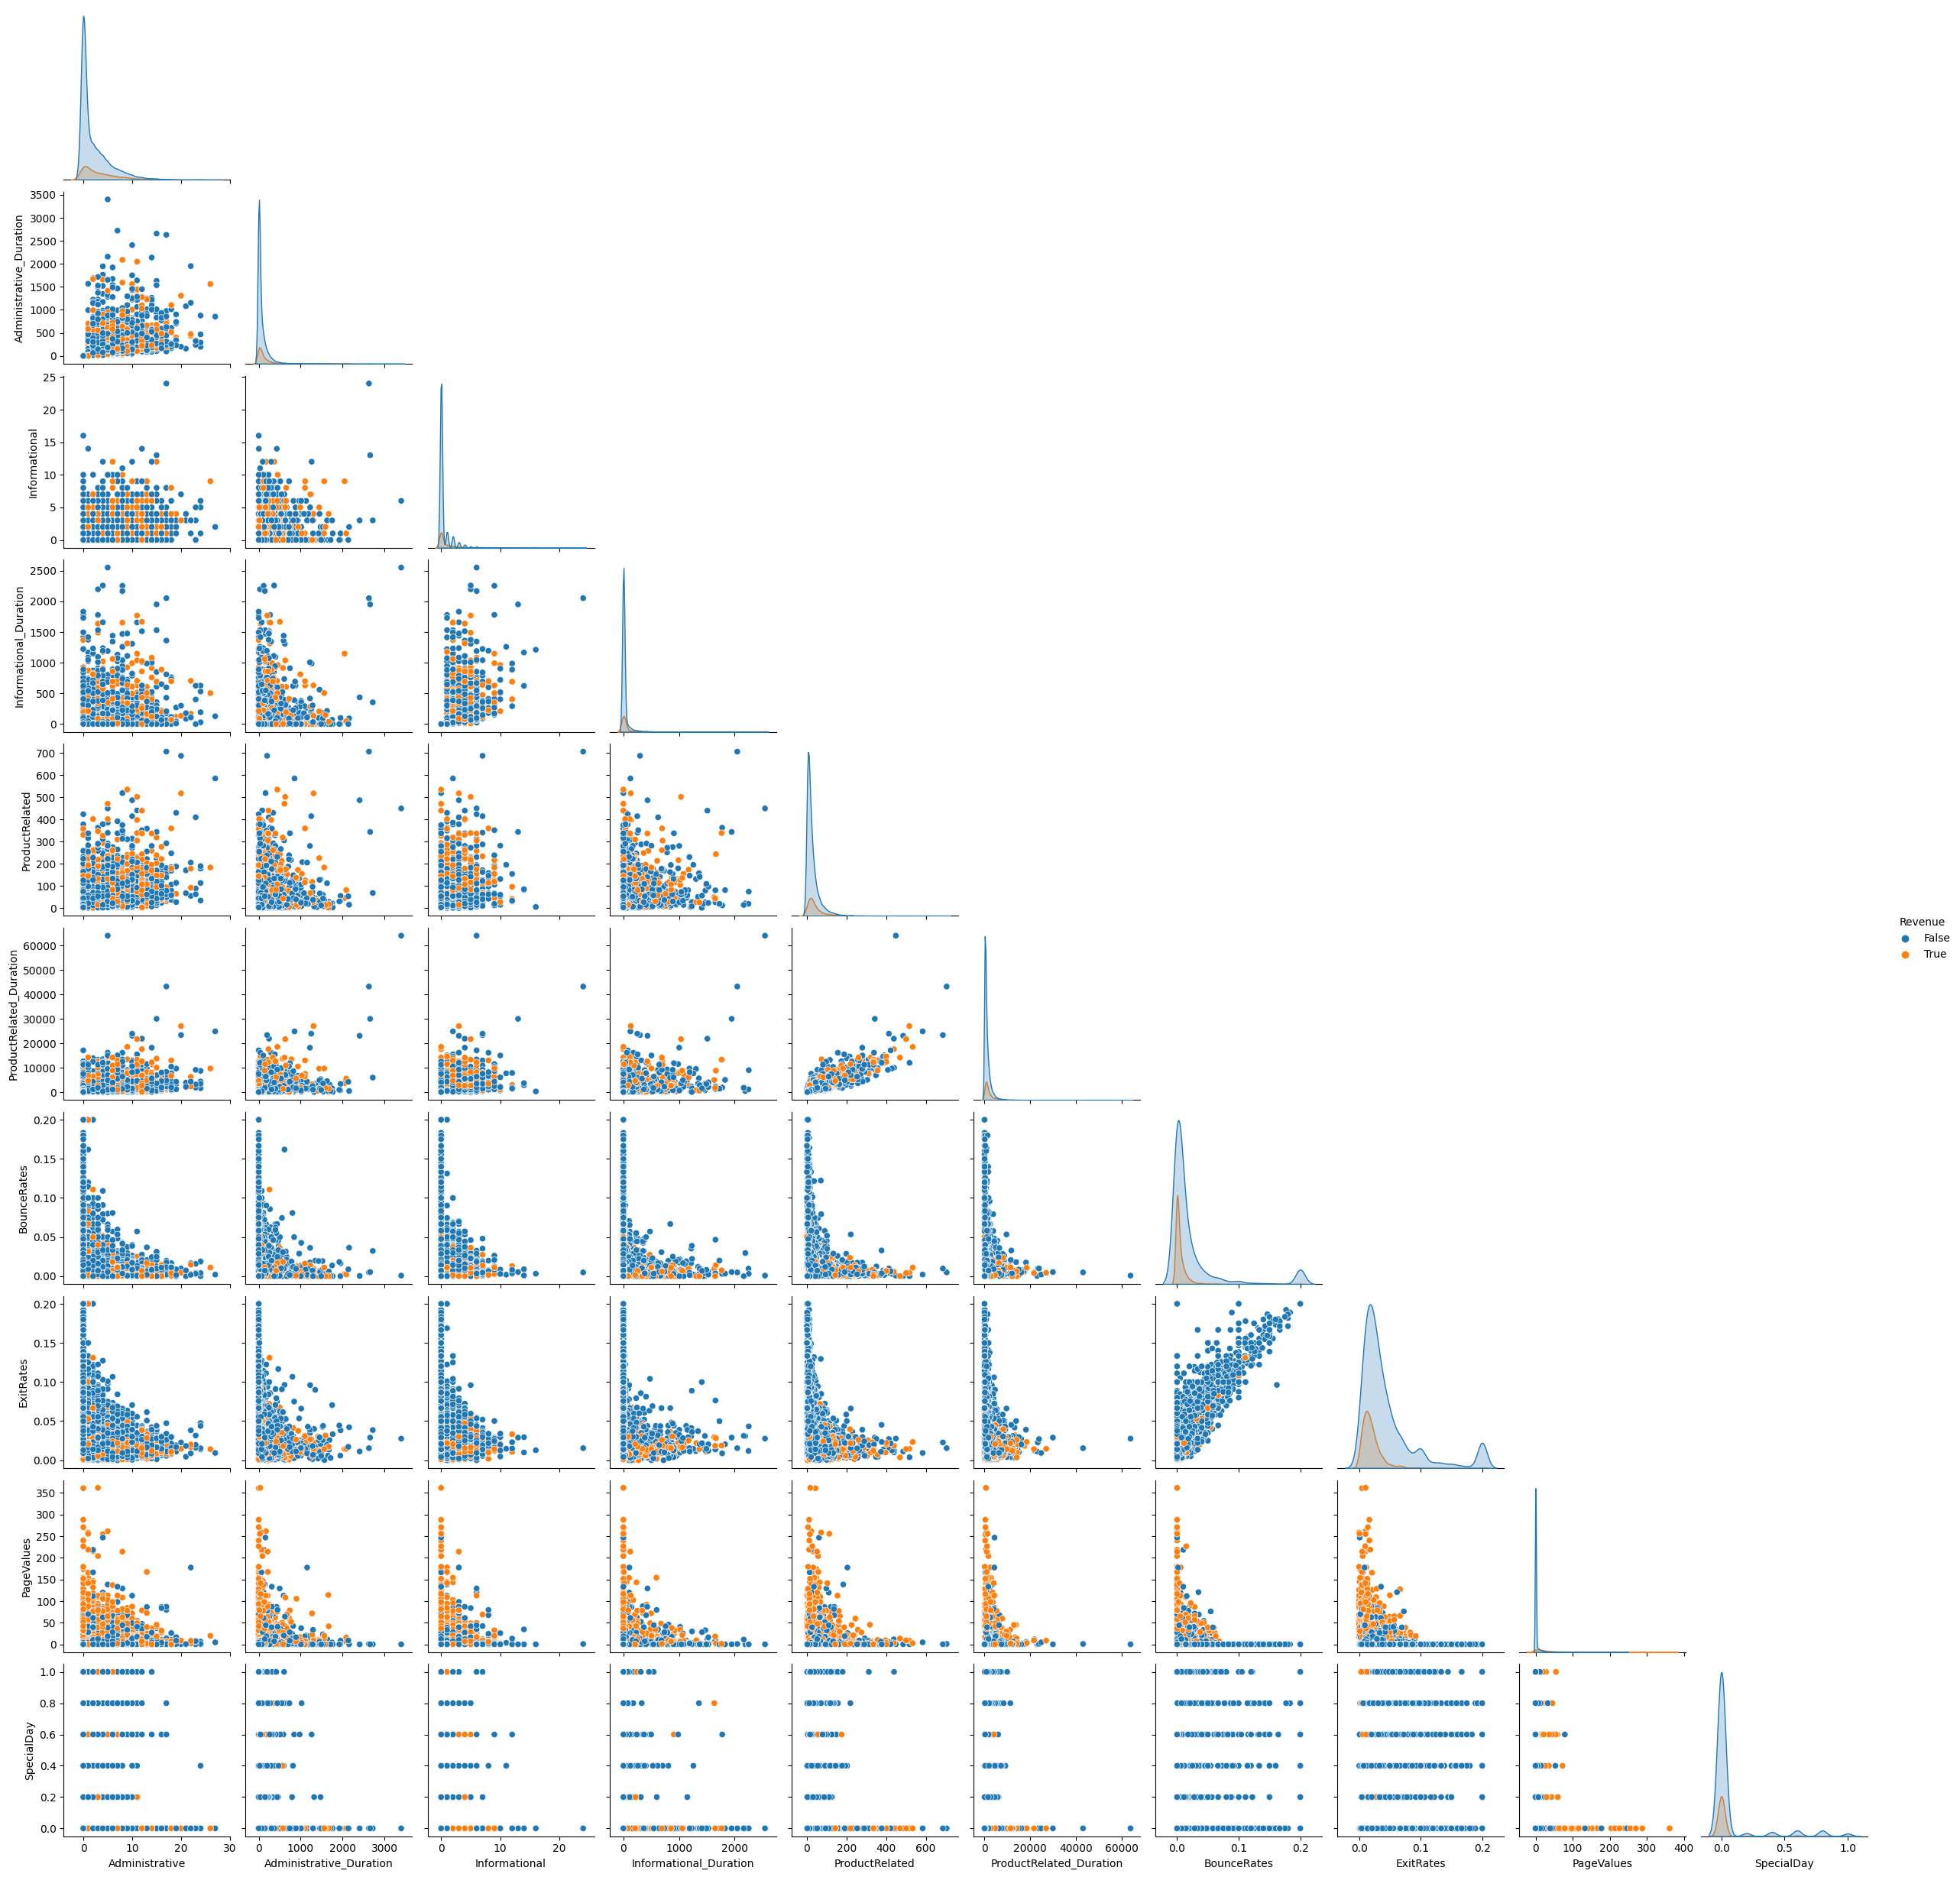

In [8]:
sb.pairplot(data, hue='Revenue', vars=numerical_features, corner=True)

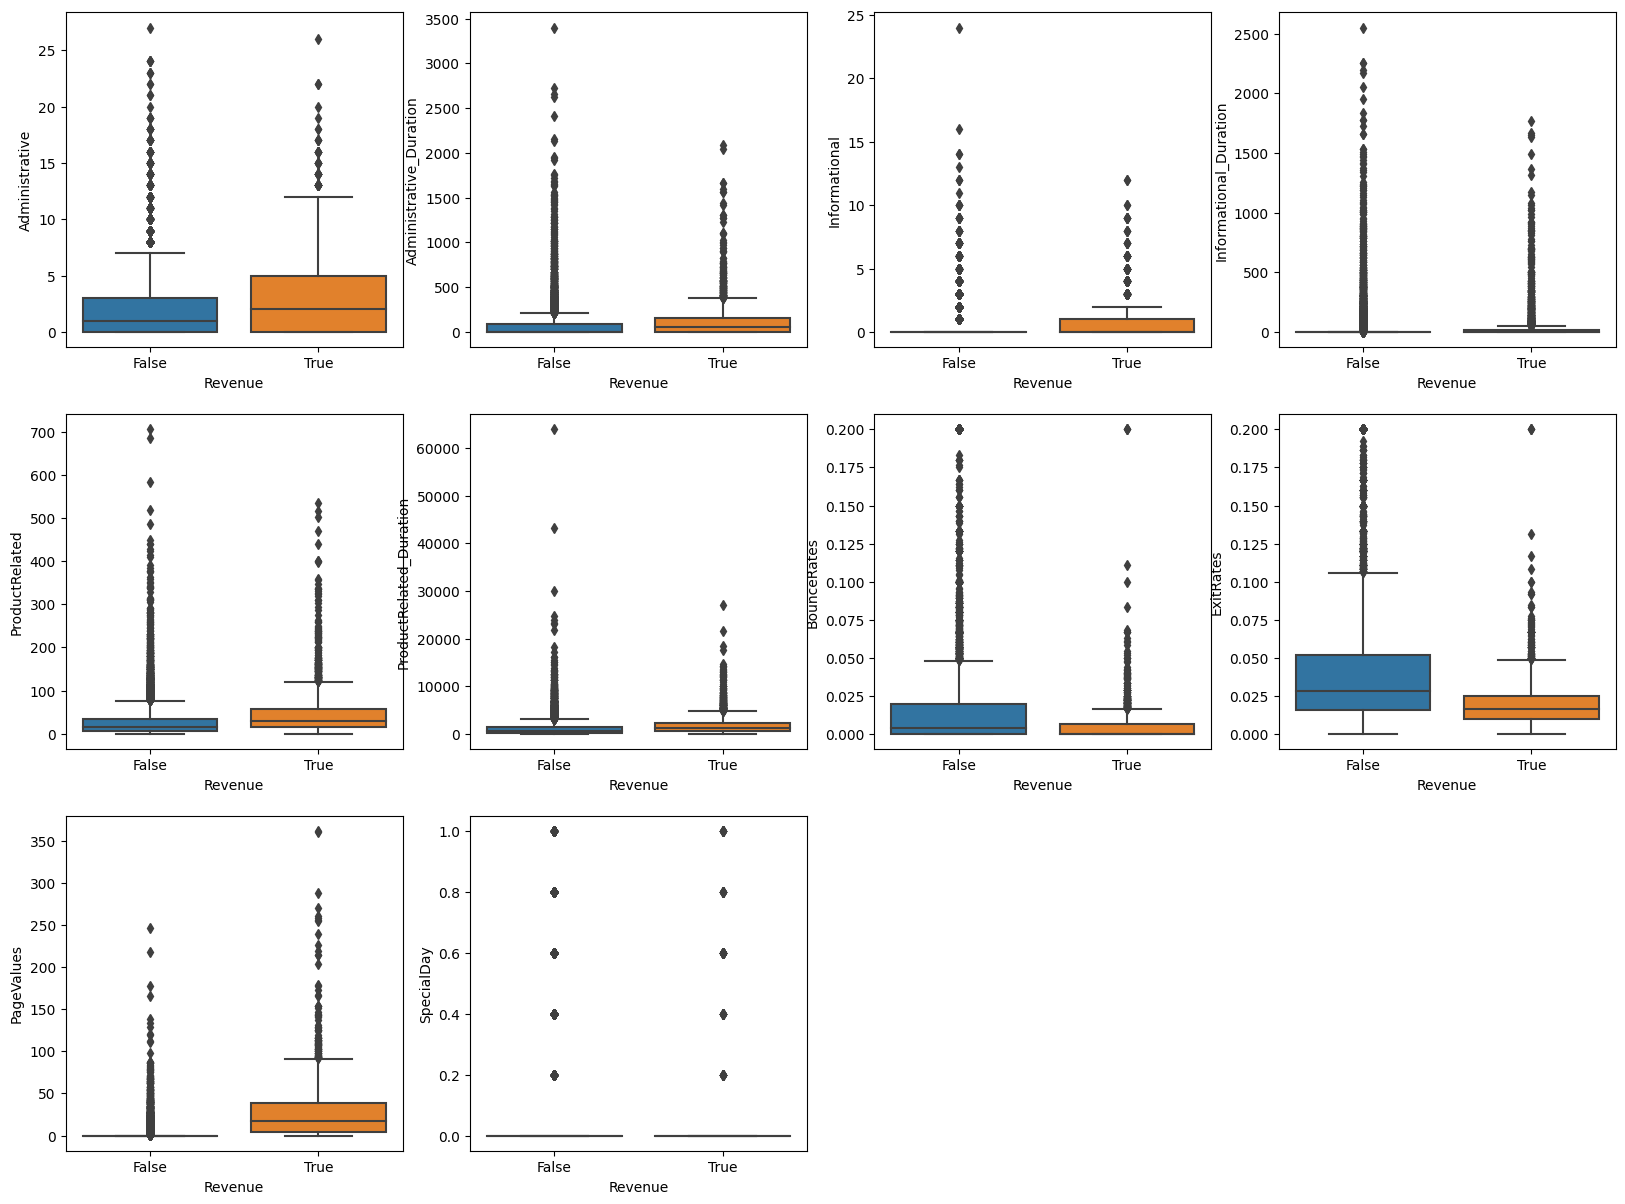

In [115]:
plt.figure(figsize=(20, 20))

for i, collumn in enumerate(numerical_features):
    plt.subplot(4, 4, i+1)
    sb.boxplot(data=data, x=target, y=collumn)
plt.show()

Number of outliers removed: 113


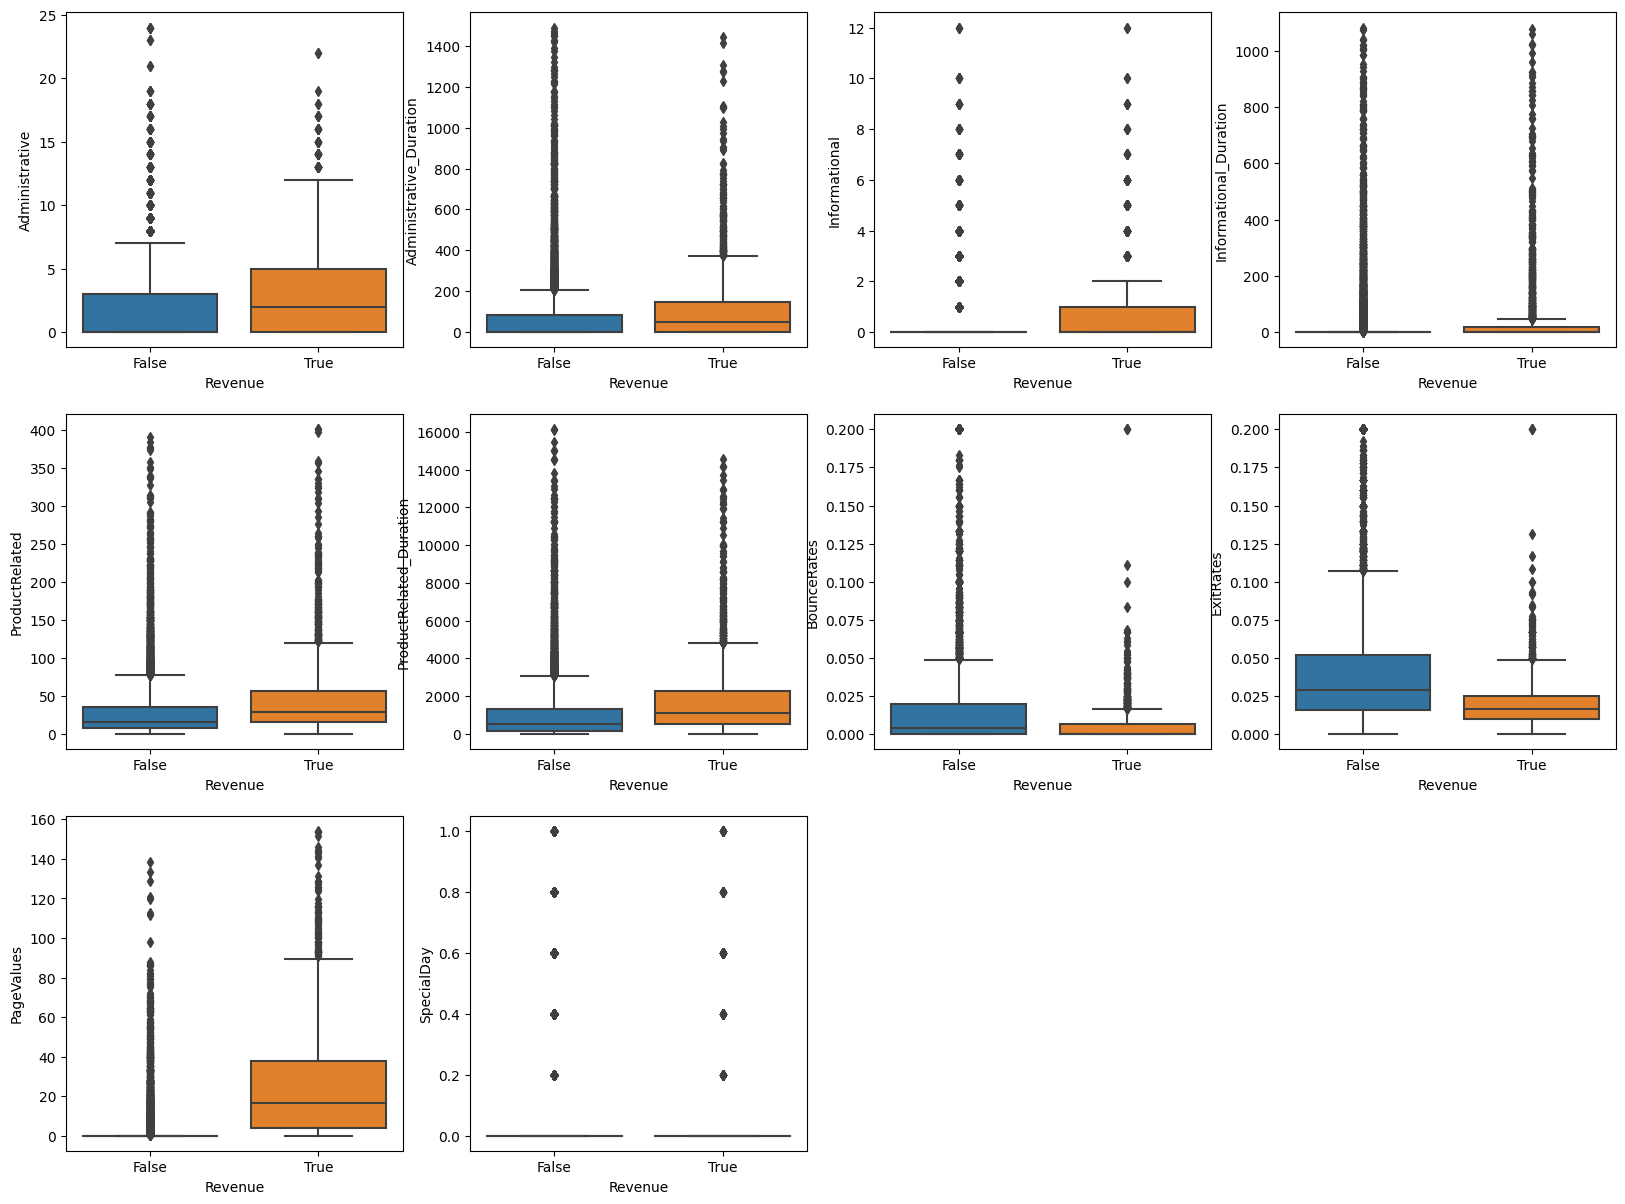

In [97]:

Q1 = data[numerical_features].quantile(0.02)
Q3 = data[numerical_features].quantile(0.98)
IQR = Q3 - Q1

# Define the threshold to identify outliers (you can adjust this value based on your data)
outlier_threshold = 1.5

# Identify outliers for each feature
outliers = (data[numerical_features] < (Q1 - outlier_threshold * IQR)) | (data[numerical_features] > (Q3 + outlier_threshold * IQR))

# Remove outliers from the dataset
data_no_outliers = data[numerical_features][~outliers.any(axis=1)]

# Print the number of removed outliers
num_outliers_removed = len(data[numerical_features]) - len(data_no_outliers)
print("Number of outliers removed:", num_outliers_removed)

data[numerical_features]=data_no_outliers
data.dropna(inplace=True)
plt.figure(figsize=(20, 20))

for i, collumn in enumerate(numerical_features):
    plt.subplot(4, 4, i+1)
    sb.boxplot(data=data, x=target, y=collumn)
plt.show()

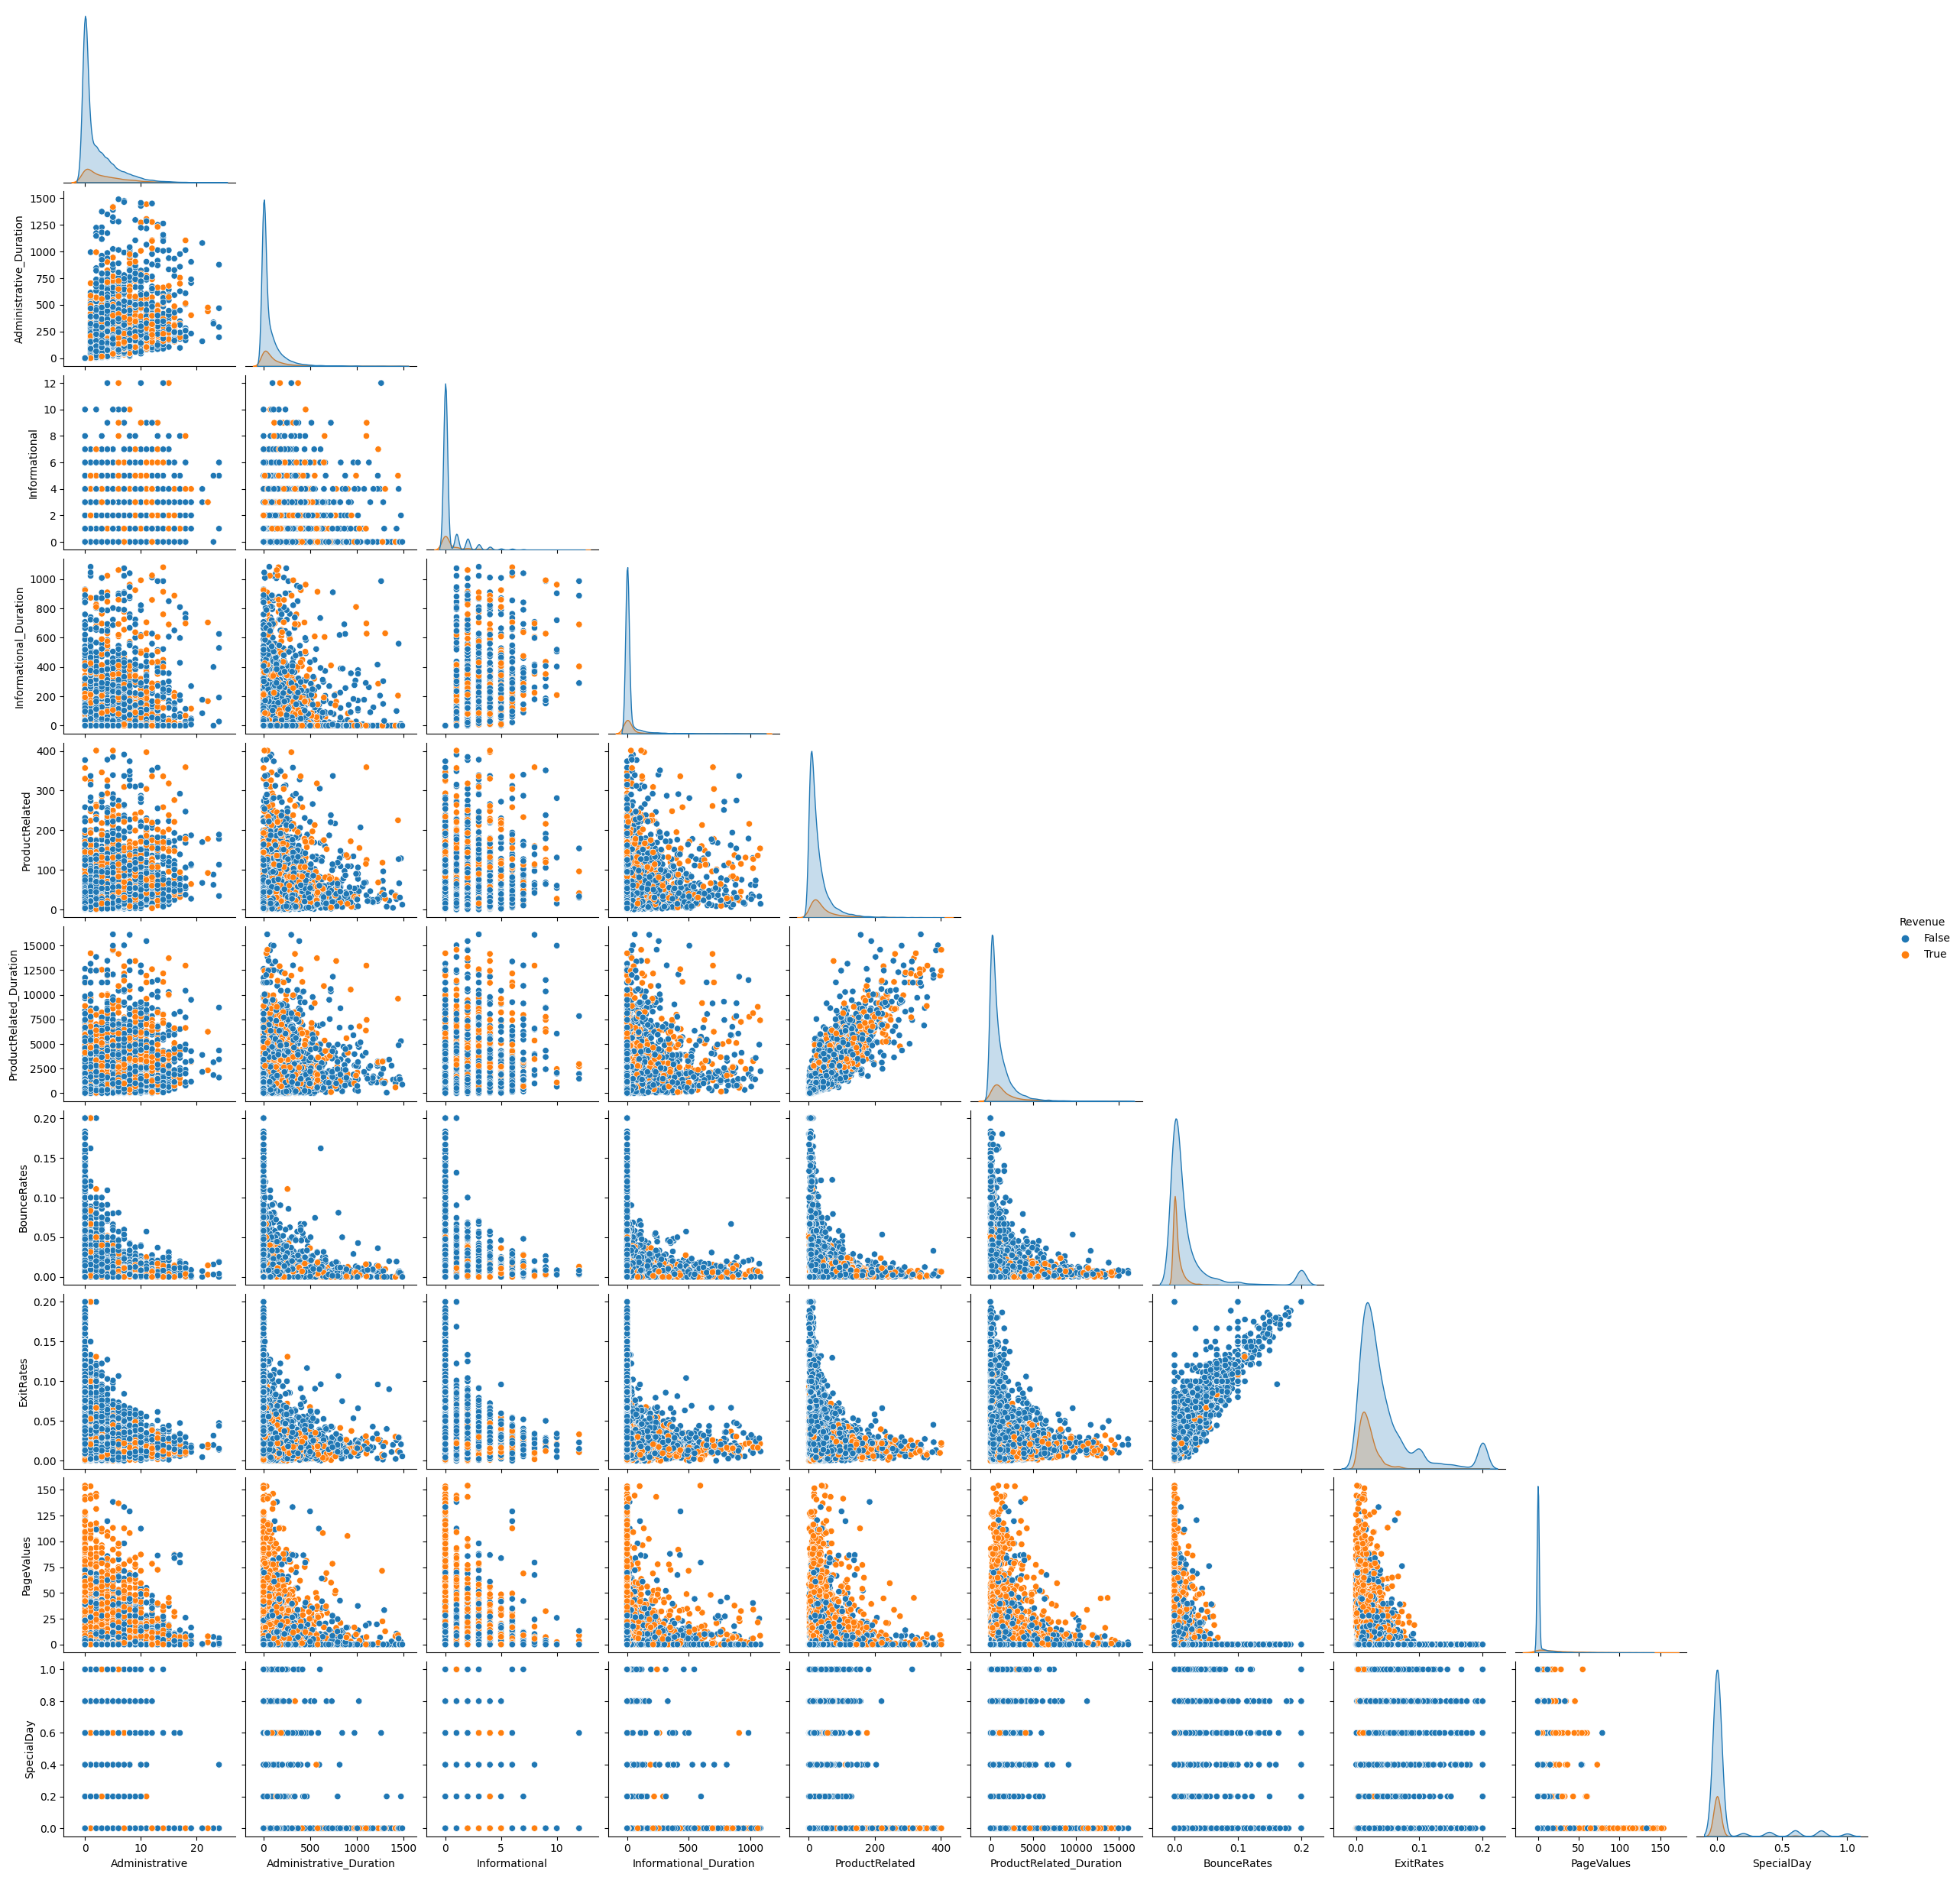

In [10]:
sb.pairplot(data, hue='Revenue', vars=numerical_features, corner=True)

In [98]:
data["Revenue"] = data["Revenue"].apply(lambda x: 1 if x == True else 0)

Encoding the categorical feautures. Now we have 76 attributes, so the 8 categorical feautures turned into 66.

In [99]:
encoder = OneHotEncoder()
for feature in categorical_features:
    onehotarray = encoder.fit_transform(data[[feature]]).toarray()
    items = [f'{feature}_{item}' for item in encoder.categories_[0]]
    data[items] = onehotarray
data=data.drop(categorical_features, axis=1)
data.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
#sb.pairplot(data, hue='Revenue', height=4)

Removing the categorical features from the data and the target from the features.

In [100]:

features=list(data.columns)
features.remove('Revenue')
features


['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems_1',
 'OperatingSystems_2',
 'OperatingSystems_3',
 'OperatingSystems_4',
 'OperatingSystems_5',
 'OperatingSystems_6',
 'OperatingSystems_7',
 'OperatingSystems_8',
 'Browser_1',
 'Browser_2',
 'Browser_3',
 'Browser_4',
 'Browser_5',
 'Browser_6',
 'Browser_7',
 'Browser_8',
 'Browser_9',
 'Browser_10',
 'Browser_11',
 'Browser_12',
 'Browser_13',
 'Region_1',
 'Region_2',
 'Region_3',
 'Region_4',
 'Region_5',
 'Region_6',
 'Region_7',
 'Region_8',
 'Region_9',
 'TrafficType_1',
 'TrafficType_2',
 'TrafficType_3',
 'TrafficType_4',
 'TrafficType_5',
 'TrafficType_6',
 'TrafficType_7',
 'TrafficType_8',
 'TrafficType_9',
 'TrafficType_10',
 'TrafficType_11',
 'TrafficType_12',
 'TrafficType_13',
 'TrafficType_14',
 'TrafficType_15',
 'TrafficType_16',
 'TrafficType_17',


Balancing the target using undersampling.

In [106]:
'''from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

print(np.array(features).dtypes)

counter = Counter(data[target])
print(counter)
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset

X, y = pipeline.fit_resample(np.array(features).reshape(1, -1), data[target])
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()
'''
def undersampling():
    target_count_1 = data["Revenue"].value_counts()
    class_0 = data[data["Revenue"] == 0]
    class_1 = data[data["Revenue"] == 1]
    #print('class 0:', class_0.shape)
    #print('class 1:', class_1.shape)

    class_0_under = class_0.sample(n=target_count_1.iloc[1])

    test_under = pd.concat([class_0_under, class_1], axis=0)

    #print("total class of 1 and 0:",test_under["Revenue"].value_counts())
    #test_under["Revenue"].value_counts().plot(kind='bar', title='count (target)')
    return test_under

data_under = undersampling()

#### Selecting the best features
As we had 58 input features, we needed to select the features that had the largest effect on the revenue, and remove those that didn’t have considerable effect on the revenue. This step is highly important to enable faster training and to avoid complicating of the model unnecessarily. 

In [56]:
def feature_selection(features, n):
    selector = SelectKBest(score_func=chi2, k=n)
    fit=selector.fit(data[features],data['Revenue'])
    # Get the selected feature indices
    selected_feature_indices = selector.get_support(indices=True)

    # Get the names of selected features
    selected_features = [data[features].columns[i] for i in selected_feature_indices]
    return selected_features

In [57]:
all_inputs = data[features].values

# Similarly, we can extract the class labels
all_labels = data[target].values

In [60]:
def trainingAndPredictions(Algorithm, name, all_inputs, all_labels, draw_confusion_matrix=False):
    X_train, X_test, y_train, y_test = train_test_split(all_inputs, all_labels, test_size=0.25)
    Algorithm.fit(X_train, y_train)
    y_pred = Algorithm.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    precision=precision_score(y_test, y_pred)
    recall=recall_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred)

    df = pd.DataFrame({"Model"           : [name],
                        "Accuracy_score"  : [accuracy],
                        "Recall_score"    : [recall],
                        "Precision"       : [precision],
                        "f1_score"        : [f1],
                        })
    if draw_confusion_matrix:
        conf_matrix = confusion_matrix(y_test, y_pred)
        sb.heatmap(conf_matrix, cmap='Blues', annot=True, xticklabels=data['Revenue'].unique(), yticklabels=data['Revenue'].unique())
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
    return df
    
def trainingAndPredictionsWithKFold(Algorithm, name,n, draw_confusion_matrix=False, data=data):
    kf = KFold(n_splits=10)
    predictions = []
    selected_features=feature_selection(features, n)
    # We can extract the data in this format from pandas like this:
    all_inputs = data[selected_features].values

    # Similarly, we can extract the class labels
    all_labels = data[target].values
    
    for i, (train_index, test_index) in enumerate(kf.split(all_inputs, all_labels)):
        # Split the data into training and testing sets
        X_train, X_test = all_inputs[train_index], all_inputs[test_index]
        y_train, y_test = all_labels[train_index], all_labels[test_index]
        Algorithm.fit(X_train, y_train)
        predictions.append(Algorithm.predict(X_test))
        
    all_predictions = np.concatenate(predictions)
    accuracy = accuracy_score(all_labels, all_predictions)
    precision = precision_score(all_labels, all_predictions)
    recall = recall_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions)
    if draw_confusion_matrix:
        df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recall],
                       "Precision"       : [precision],
                       "f1_score"        : [f1],
                      })
        conf_matrix = confusion_matrix(all_labels, all_predictions)
        sb.heatmap(conf_matrix, cmap='Blues', annot=True, xticklabels=data['Revenue'].unique(), yticklabels=data['Revenue'].unique())
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
        return df
    return accuracy, precision, recall, f1

    
def trainingRepetitions(Algorithm, name, all_inputs, all_labels):
    model_accuracies = []
    predictions = []
    for repetition in range(1000):
        X_train, X_test, y_train, y_test = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=repetition)
        Algorithm.fit(X_train, y_train)
        accuracy = Algorithm.score(X_test, y_test)
        model_accuracies.append(accuracy)
        predictions.append(Algorithm.predict(X_test))
        
    plt.hist(model_accuracies)
    
def features_num_trainingAndPredictionsWithKFold(Algorithm, name):
    accuracy_scores=[]
    precision_scores=[]
    recall_scores=[]
    f1_scores=[]
    size_features=[]
    max_precision=0
    num_features=0
    for i in range(5, len(features)):

        accuracy_score, precision_score, recall_score, f1_score=trainingAndPredictionsWithKFold(Algorithm, name, i)
        accuracy_scores.append(accuracy_score)
        precision_scores.append(precision_score)
        recall_scores.append(recall_score)
        f1_scores.append(f1_score)
        size_features.append(i)
        if(precision_score>max_precision):
            max_precision=precision_score
            num_features=i
    plt.plot(size_features, accuracy_scores, label="accuracy")
    plt.plot(size_features, precision_scores, label="precision")
    plt.plot(size_features, recall_scores, label="recall")
    plt.plot(size_features, f1_scores, label="f1")
    plt.legend()
    return num_features
        
        
        




    

### DECISION TREE

Firstly we will try to find the best parameters for the Decision Tree Classifier using GridSearchCV

In [21]:
'''decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4, 5], 
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'max_features': [None, 'sqrt', 'log2', 2, 4], 
    'random_state': [None, 2, 42, 100],
      }


cross_validation = KFold(n_splits=10)

grid_search = GridSearchCV( decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier'''

#Best score: 0.8989620842899531
#Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


KeyboardInterrupt: 

Then we can teach the algorithm using the best parameters and using kFold cross validation to check the accuracy of the model

Then we can plot the confusion matrix and the ROC curve to check the performance of the model

Number of features:  29


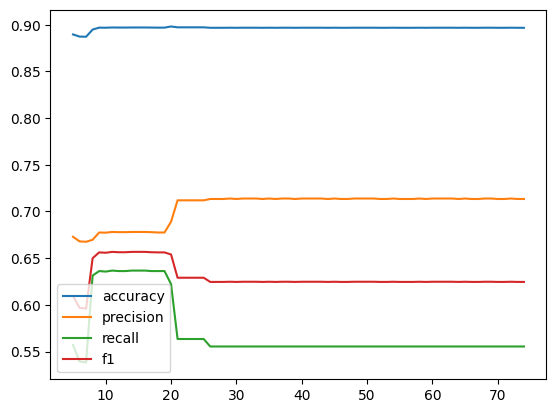

In [61]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=5, criterion='entropy', splitter='best')
num_features=features_num_trainingAndPredictionsWithKFold(decision_tree_classifier, "Decision Tree")
print("Number of features: ", num_features)




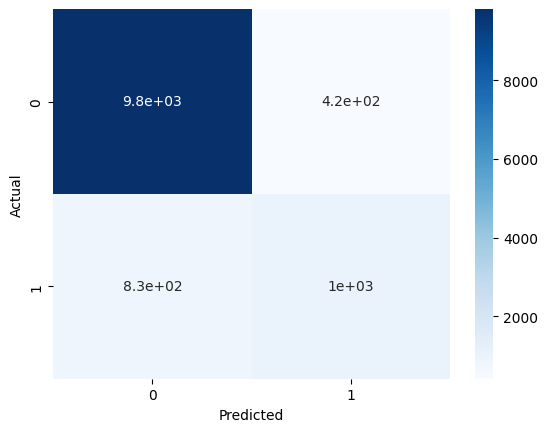

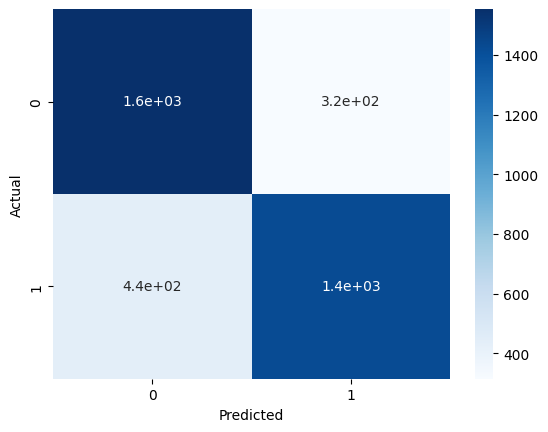

,Model,Accuracy_score,Recall_score,Precision,f1_score
0,Decision Tree,0.797753,0.764045,0.819277,0.790698


In [69]:
model_DT_Kfold=trainingAndPredictionsWithKFold(decision_tree_classifier, "Decision Tree", 29, True, data)
model_DT_Kfold

model_DT_Kfold_undersampling=trainingAndPredictionsWithKFold(decision_tree_classifier, "Decision Tree", 29, True, data_under)
model_DT_Kfold_undersampling

In [127]:
with open('dtc_tree.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)
    
from subprocess import check_call
check_call(['dot','-Tpng','dtc_tree.dot','-o','dtc_tree.png'])

0

<img src="dtc_tree.png"/>

### RANDOM FOREST

Firstly we will try to find the best parameters for the random florest using GridSearchCV

In [128]:
'''random_florest_classifier = RandomForestClassifier()

parameter_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [1, 2, 3], 
    'min_samples_split': [2, 3, 4],
    'max_leaf_nodes': [None, 2, 4, 6, 8],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'bootstrap': [True, False],
    'oob_score': [True, False],
    'n_jobs': [None, 1, 2, 3],
    'warm_start': [True, False],
    'ccp_alpha': [0.0, 0.1, 0.2],
    'max_samples': [None, 2, 4, 6],
}

     
cross_validation = KFold(n_splits=10)

grid_search = GridSearchCV( random_florest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))'''


"random_forest_classifier = RandomForestClassifier()\n\nparameter_grid = {\n    'criterion': ['gini', 'entropy', 'log_loss'],\n    'n_estimators': [50, 100, 200],\n    'max_depth': [3, 5, 10, None],\n    'min_samples_leaf': [1, 2, 3], \n    'min_samples_split': [2, 3, 4],\n    'max_leaf_nodes': [None, 2, 4, 6, 8],\n    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],\n    'min_impurity_decrease': [0.0, 0.1, 0.2],\n    'bootstrap': [True, False],\n    'oob_score': [True, False],\n    'n_jobs': [None, 1, 2, 3],\n    'warm_start': [True, False],\n    'ccp_alpha': [0.0, 0.1, 0.2],\n    'max_samples': [None, 2, 4, 6],\n}\n\n     \ncross_validation = KFold(n_splits=10)\n\ngrid_search = GridSearchCV( random_forest_classifier,\n                           param_grid=parameter_grid,\n                           cv=cross_validation)\n\ngrid_search.fit(all_inputs, all_labels)\n\nprint('Best score: {}'.format(grid_search.best_score_))\nprint('Best parameters: {}'.format(grid_search.best_params_))"

In [70]:
random_florest_classifier = RandomForestClassifier(n_estimators=50, max_depth=None, max_features='sqrt')
num_features=features_num_trainingAndPredictionsWithKFold(random_florest_classifier, "Random Forest")
print("Number of features: ", num_features)

KeyboardInterrupt: 

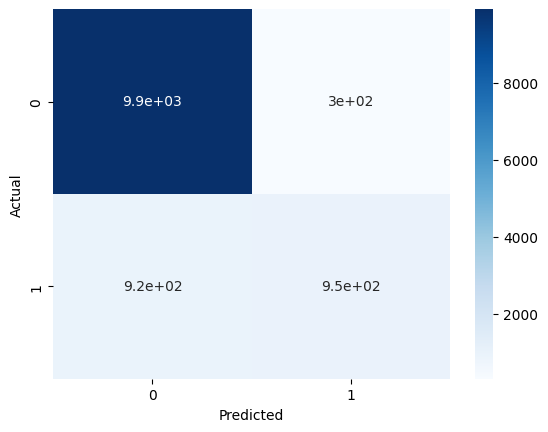

,Model,Accuracy_score,Recall_score,Precision,f1_score
0,Random Forest,0.898859,0.508293,0.757576,0.608389


In [142]:
model_RF_Kfold=trainingAndPredictionsWithKFold(random_florest_classifier, "Random Forest", num_features, True, data)
model_RF_Kfold


model_RF_Kfold_undersampling=trainingAndPredictionsWithKFold(decision_tree_classifier, "Random Forest", num_features, True, data_under)
model_RF_Kfold_undersampling

### KNN

In [20]:
knn = KNeighborsClassifier()

parameter_grid = {'n_neighbors': [5, 6, 7, 8, 9, 10,12, 14, 15,16, 20], 
                  'weights': ['uniform', 'distance'],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'n_jobs': [None, 1, 2, 3],
                  'leaf_size': [10, 20, 30, 40, 50],
                  'p': [1, 2, 3, 4, 5],
                  'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev'],
                  'metric_params': [None, 1, 2, 3, 4, 5],
                  }


cross_validation = KFold(n_splits=10)

grid_search = GridSearchCV( knn,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

knn_classifier = grid_search.best_estimator_
knn_classifier


KeyboardInterrupt: 

Then we can teach the algorithm using the best parameters and using kFold cross validation to check the accuracy of the model

Then we can plot the confusion matrix and the ROC curve to check the performance of the model

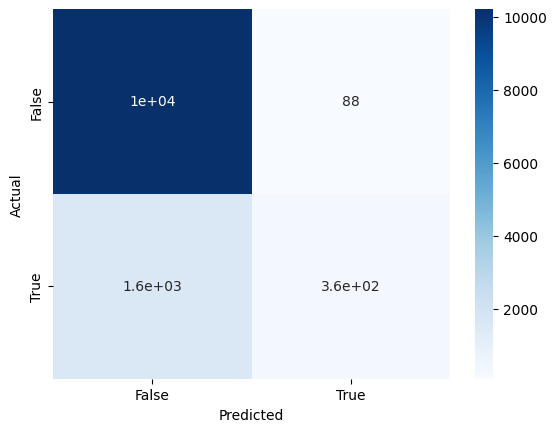

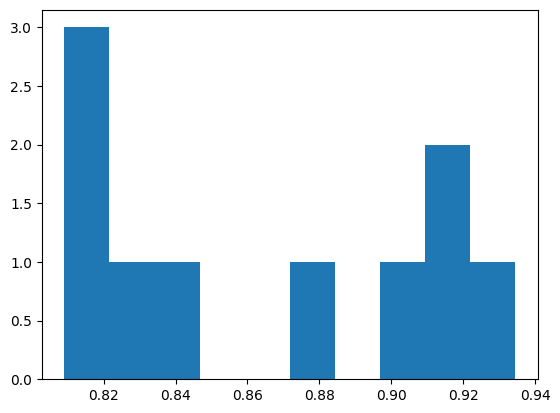

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=14)
num_features=features_num_trainingAndPredictionsWithKFold(knn_classifier, "KNN")
print("Number of features: ", num_features)

In [73]:
model_KNN_Kfold=trainingAndPredictionsWithKFold(knn_classifier, "KNN", num_features, True, data)

model_KNN_Kfold_undersampling=trainingAndPredictionsWithKFold(knn_classifier, "KNN", num_features, True, data_under)


NameError: name 'knn_classifier' is not defined

### SVN

In [ ]:
svn = SVC()

parameter_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
                  'degree': [1, 2, 3, 4, 5],
                  'gamma': ['scale', 'auto', 1, 2, 3, 4, 5],
                  'coef0': [0.0, 0.1, 0.2],
                  'shrinking': [True, False],
                  'probability': [True, False],
                  'tol': [0.001, 0.01, 0.1, 1, 2, 3, 4, 5],
                  'cache_size': [200, 300, 400, 500],
                  'class_weight': [None, 'balanced'],
                  'decision_function_shape': ['ovo', 'ovr'],
                    'break_ties': [True, False],
                  }


cross_validation = KFold(n_splits=10)

grid_search = GridSearchCV( knn,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

knn_classifier = grid_search.best_estimator_
knn_classifier

In [72]:
model_performances = pd.concat([model_DT_Kfold, model_DT_Kfold_undersampling, model_RF_Kfold, model_RF_Kfold_undersampling, model_KNN_Kfold],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

model_performances

,Model,Accuracy_score,Recall_score,Precision,f1_score
0,Decision Tree,0.896874,0.555377,0.713893,0.624737
1,Decision Tree,0.797753,0.764045,0.819277,0.790698
